# Exploring and pre-processing a dataset

Dataset Source: [International migration flows to and from selected countries - The 2015 revision](https://www.un.org/development/desa/pd/data/international-migration-flows).

The dataset contains annual data on the flows of international immigrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals. The current version presents data pertaining to 45 countries.

In this lab, we will focus on the Canadian immigration data.

![Data Preview](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%201/images/DataSnapshot.png)

 The Canada Immigration dataset can be fetched from <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx">here</a>.


In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [2]:
# Let's download and import our primary Canadian Immigration dataset using pandas's read_excel() method.
df_can = pd.read_excel(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)

print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [3]:
# Let's view the top 5 rows of the dataset using the head() function.
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
# We can also view the bottom 5 rows of the dataset using the tail() function.
df_can.tail()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,...,1450,615,454,663,611,508,494,434,437,407


In [5]:
# When analyzing a dataset, it's always a good idea to start by getting basic information about your dataframe.
# We can do this by using the info() method.
# This method can be used to get a short summary of the dataframe.
df_can.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 43 entries, Type to 2013
dtypes: int64(37), object(6)
memory usage: 65.6+ KB


In [6]:
# To get the list of column headers we can call upon the data frame's columns instance variable.
df_can.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [7]:
# Similarly, to get the list of indices we use the .index instance variables.
df_can.index

RangeIndex(start=0, stop=195, step=1)

In [8]:
print(type(df_can.columns))
print(type(df_can.index))

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.range.RangeIndex'>


In [9]:
df_can.columns.tolist()

['Type',
 'Coverage',
 'OdName',
 'AREA',
 'AreaName',
 'REG',
 'RegName',
 'DEV',
 'DevName',
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013]

In [10]:
df_can.index.tolist()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [11]:
print(type(df_can.columns.tolist()))
print(type(df_can.index.tolist()))

<class 'list'>
<class 'list'>


In [12]:
# size of dataframe (rows, columns)
df_can.shape

(195, 43)

In [13]:
# Let's clean the data set to remove a few unnecessary columns. We can use pandas drop() method as follows:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


In [14]:
# Let's rename the columns so that they make sense. We can use rename() method by passing in a dictionary of old and new names as follows:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

In [15]:
df_can[1980].dtypes

dtype('int64')

In [16]:
# We will also add a 'Total' column that sums up the total immigrants by country over the entire period 1980 - 2013, as follows:
df_can['Total'] = df_can.loc[:, 1980:2013].sum(axis=1)
df_can['Total'].head(10)

,Total
0,58639
1,15699
2,69439
3,6
4,15
5,2113
6,981
7,19596
8,3310
9,23829


In [17]:
# We can check to see how many null objects we have in the dataset as follows:
df_can.isnull().sum()

,0
Country,0
Continent,0
Region,0
DevName,0
1980,0
1981,0
1982,0
1983,0
1984,0
1985,0


In [18]:
df_can.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


In [19]:
# Let's try filtering on the list of countries ('Country').
df_can.Country  # returns a series

,Country
0,Afghanistan
1,Albania
2,Algeria
3,American Samoa
4,Andorra
5,Angola
6,Antigua and Barbuda
7,Argentina
8,Armenia
9,Australia


In [20]:
# Let's try filtering on the list of countries ('Country') and the data for years: 1980 - 1985.
df_can[['Country', 1980, 1981, 1982, 1983, 1984, 1985]] # returns a dataframe

,Country,1980,1981,1982,1983,1984,1985
0,Afghanistan,16,39,39,47,71,340
1,Albania,1,0,0,0,0,0
2,Algeria,80,67,71,69,63,44
3,American Samoa,0,1,0,0,0,0
4,Andorra,0,0,0,0,0,0
...,...,...,...,...,...,...,...
190,Viet Nam,1191,1829,2162,3404,7583,5907
191,Western Sahara,0,0,0,0,0,0
192,Yemen,1,2,1,6,0,18
193,Zambia,11,17,11,7,16,9


There are main 2 ways to select rows:

```python
    df.loc[label]    # filters by the labels of the index/column
    df.iloc[index]   # filters by the positions of the index/column
```

Before we proceed, notice that the default index of the dataset is a numeric range from 0 to 194. This makes it very difficult to do a query by a specific country. For example to search for data on Japan, we need to know the corresponding index value.

This can be fixed very easily by setting the 'Country' column as the index using set_index() method.

In [21]:
df_can.set_index('Country', inplace=True)

In [22]:
df_can.head(3)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


In [23]:
# 1. the full row data (all columns)
df_can.loc['Japan']

,Japan
Continent,Asia
Region,Eastern Asia
DevName,Developed regions
1980,701
1981,756
1982,598
1983,309
1984,246
1985,198
1986,248


In [24]:
# alternate methods
df_can.iloc[87]

,Japan
Continent,Asia
Region,Eastern Asia
DevName,Developed regions
1980,701
1981,756
1982,598
1983,309
1984,246
1985,198
1986,248


In [25]:
df_can[df_can.index == 'Japan']

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Japan,Asia,Eastern Asia,Developed regions,701,756,598,309,246,198,248,...,1067,1212,1250,1284,1194,1168,1265,1214,982,27707


In [26]:
# 2. for year 2013
df_can.loc['Japan', 2013]

982

In [27]:
# year 2013 is the last column, with a positional index of 36
df_can.iloc[87, 36]

982

In [28]:
# 3. for years 1980 to 1985
df_can.loc['Japan', [1980, 1981, 1982, 1983, 1984, 1984]]

,Japan
1980,701
1981,756
1982,598
1983,309
1984,246
1984,246


In [29]:
df_can.loc['Haiti']
df_can.loc['Haiti', 2000]
df_can.loc['Haiti', [1990, 1991, 1992, 1993, 1994, 1995]]

,Haiti
1990,2379
1991,2829
1992,2399
1993,3655
1994,2100
1995,2014


In [30]:
# To avoid this ambuigity, let's convert the column names into strings: '1980' to '2013'.
df_can.columns = list(map(str, df_can.columns))
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [31]:
# create the condition boolean series
condition = df_can['Continent'] == 'Asia'
print(condition)

Country
Afghanistan        True
Albania           False
Algeria           False
American Samoa    False
Andorra           False
                  ...  
Viet Nam           True
Western Sahara    False
Yemen              True
Zambia            False
Zimbabwe          False
Name: Continent, Length: 195, dtype: bool


In [32]:
df_can[condition]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,224,218,198,205,267,252,236,258,207,3310
Azerbaijan,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,359,236,203,125,165,209,138,161,57,2649
Bahrain,Asia,Western Asia,Developing regions,0,2,1,1,1,3,0,...,12,12,22,9,35,28,21,39,32,475
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,...,5,10,7,36,865,1464,1879,1075,487,5876
Brunei Darussalam,Asia,South-Eastern Asia,Developing regions,79,6,8,2,2,4,12,...,4,5,11,10,5,12,6,3,6,600
Cambodia,Asia,South-Eastern Asia,Developing regions,12,19,26,33,10,7,8,...,370,529,460,354,203,200,196,233,288,6538
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962


In [33]:
# we can pass multiple criteria in the same line.
# let's filter for AreaNAme = Asia and RegName = Southern Asia
df_can[(df_can['Continent']=='Asia') & (df_can['Region']=='Southern Asia')]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,...,5,10,7,36,865,1464,1879,1075,487,5876
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Maldives,Asia,Southern Asia,Developing regions,0,0,0,1,0,0,0,...,0,0,2,1,7,4,3,1,1,30
Nepal,Asia,Southern Asia,Developing regions,1,1,6,1,2,4,13,...,607,540,511,581,561,1392,1129,1185,1308,10222
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358


In [34]:
df_can[(df_can['Continent']=='Africa') & (df_can['Region']=='Southern Africa')]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Botswana,Africa,Southern Africa,Developing regions,10,1,3,3,7,4,2,...,7,11,8,28,15,42,53,64,76,396
Lesotho,Africa,Southern Africa,Developing regions,1,1,1,2,7,5,3,...,4,0,4,1,8,7,1,0,6,107
Namibia,Africa,Southern Africa,Developing regions,0,5,5,3,2,1,1,...,6,19,13,26,14,16,23,24,83,320
South Africa,Africa,Southern Africa,Developing regions,1026,1118,781,379,271,310,718,...,988,1111,1200,1123,1188,1238,959,1243,1240,40568
Swaziland,Africa,Southern Africa,Developing regions,4,1,1,0,10,7,1,...,7,7,5,6,10,3,13,17,39,188


In [35]:
# Let's sort out dataframe df_can on 'Total' column,
# in descending order to find out the top 5 countries that contributed the most to immigration to Canada.
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)
top_5 = df_can.head(5)
top_5

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [36]:
# Find out top 3 countries that contributes the most to immigration to Canda in the year 2010.
df_can.sort_values(by='2010', ascending=False, axis=0, inplace=True)
top3_2010 = df_can['2010'].head(3)
top3_2010

,2010
Country,
Philippines,38617
India,34235
China,30391


# Visualizing Data using Matplotlib

Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shell, the jupyter notebook, web application servers, and four graphical user interface toolkits.

In [37]:
# we are using the inline backend
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

In [38]:
print('Matplotlib version: ', mpl.__version__)  # >= 2.0.0

Matplotlib version:  3.7.1


In [39]:
print(plt.style.available)
mpl.style.use(['ggplot']) # optional: for ggplot-like style

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


## Line Plots

**Let's start with a case study**:

In 2010, Haiti suffered a catastrophic magnitude 7.0 earthquake. The quake caused widespread devastation and loss of life and about three million people were affected by this natural disaster. As part of Canada's humanitarian effort, the Government of Canada stepped up its effort in accepting refugees from Haiti. We can quickly visualize this effort using a Line plot:

In [40]:
#Since we converted the years to string,
#let's declare a variable that will allow us to easily call upon the full range of years:
years = list(map(str, range(1980, 2014)))
#creating data series
haiti = df_can.loc['Haiti', years] # passing in years 1980 - 2013 to exclude the 'total' column
haiti.head()

,Haiti
1980,1666
1981,3692
1982,3498
1983,2860
1984,1418


<Axes: >

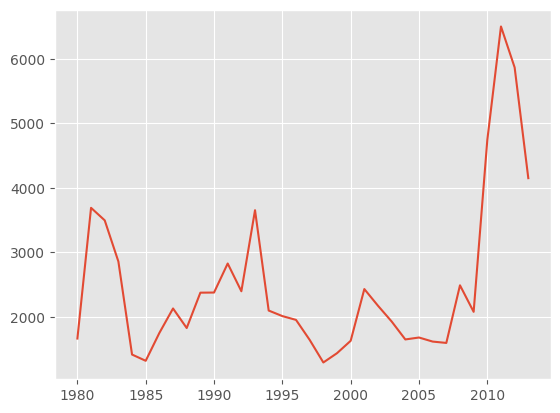

In [41]:
# Next, we will plot a line plot by appending .plot() to the haiti dataframe.
haiti.plot()

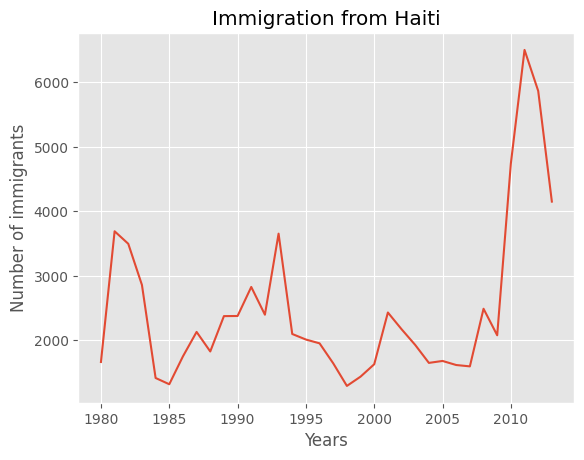

In [42]:
# pandas automatically populated the x-axis with the index values (years), and the y-axis with the column values (population).
# Also, let's label the x and y axis using plt.title(), plt.ylabel(), and plt.xlabel() as follows:
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show() # need this line to show the updates made to the figure

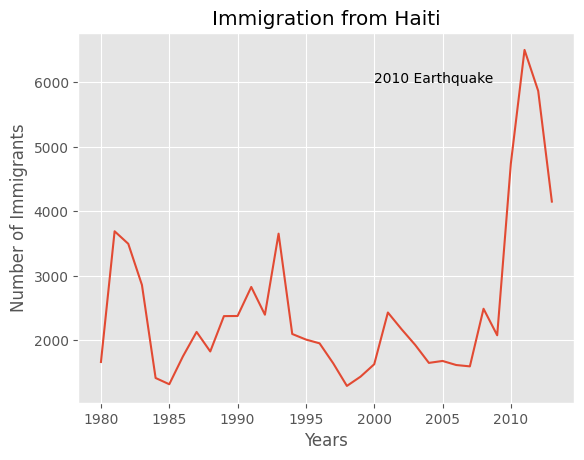

In [43]:
# We can clearly notice how number of immigrants from Haiti spiked up from 2010 as Canada stepped up its efforts to accept refugees from Haiti.
# Let's annotate this spike in the plot by using the plt.text() method.
# However, notice that years are of type string. Let's change the type of the index values to integer first.
haiti.index = haiti.index.map(int)
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# annotate the 2010 Earthquake.
# syntax: plt.text(x, y, label)
plt.text(2000, 6000, '2010 Earthquake') # see note below

plt.show()

In [44]:
# Let's compare the number of immigrants from India and China from 1980 to 2013.
df_CI = df_can.loc[['India', 'China'], years]
df_CI

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129


<Axes: xlabel='Country'>

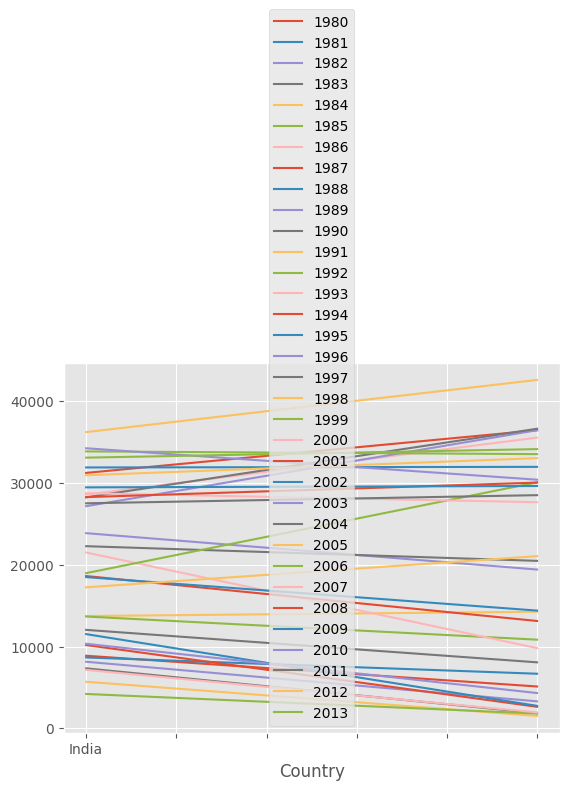

In [45]:
# Plot it
df_CI.plot(kind='line')

That doesn't look right...

In [46]:
df_CI = df_CI.transpose()
df_CI.head()

Country,India,China
1980,8880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,5704,1527


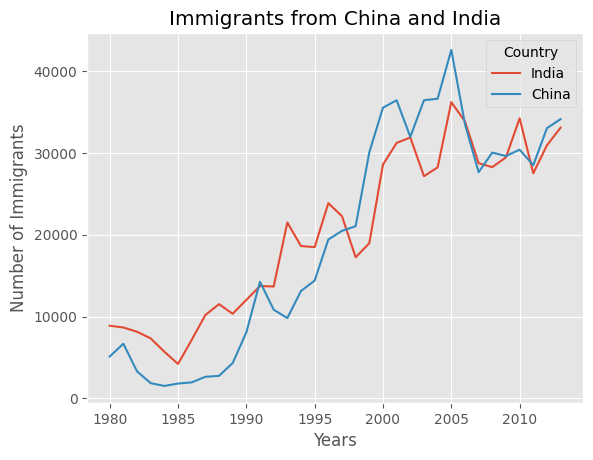

In [47]:
df_CI.index = df_CI.index.map(int) # let's change the index values of df_CI to type integer for plotting
df_CI.plot(kind='line')

plt.title('Immigrants from China and India')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

Country  India  China  United Kingdom of Great Britain and Northern Ireland  \
1980      8880   5123                                              22045      
1981      8670   6682                                              24796      
1982      8147   3308                                              20620      
1983      7338   1863                                              10015      
1984      5704   1527                                              10170      
1985      4211   1816                                               9564      
1986      7150   1960                                               9470      
1987     10189   2643                                              21337      
1988     11522   2758                                              27359      
1989     10343   4323                                              23795      
1990     12041   8076                                              31668      
1991     13734  14255                               

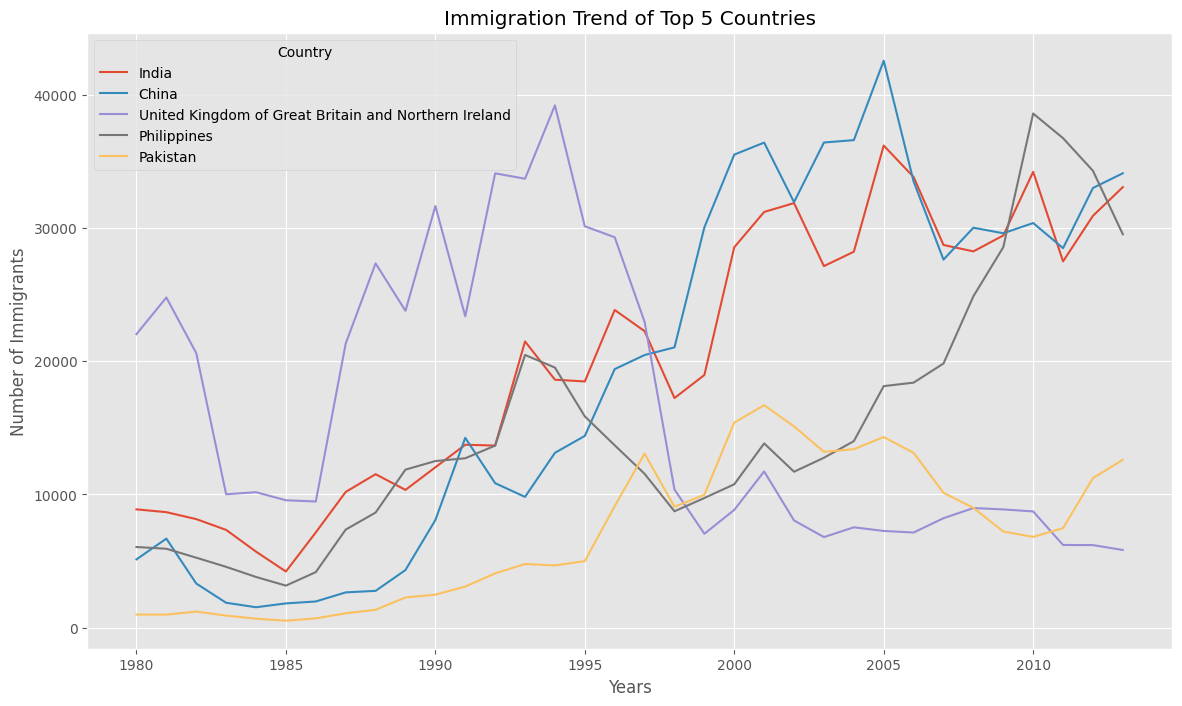

In [48]:
# Compare the trend of top 5 countries that contributed the most to immigration to Canada.
inplace = True # paramemter saves the changes to the original df_can dataframe
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df_can.head(5)

# transpose the dataframe
df_top5 = df_top5[years].transpose()

print(df_top5)

#Step 2: Plot the dataframe. To make the plot more readeable, we will change the size using the `figsize` parameter.
df_top5.index = df_top5.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_top5.plot(kind='line', figsize=(14, 8)) # pass a tuple (x, y) size

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

## Pie Charts

In [49]:
# group countries by continents and apply sum() function
df_continents = df_can.groupby('Continent', axis=0).sum()

# note: the output of the groupby method is a `groupby' object.
# we can not use it further until we apply a function (eg .sum())
print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


<ipython-input-49-df290949f8e6>:2: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  df_continents = df_can.groupby('Continent', axis=0).sum()
<ipython-input-49-df290949f8e6>:6: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  print(type(df_can.groupby('Continent', axis=0)))


,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,Northern AfricaNorthern AfricaNorthern AfricaE...,Developing regionsDeveloping regionsDeveloping...,3951,4363,3819,2671,2639,2650,3782,7494,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,Southern AsiaEastern AsiaSouth-Eastern AsiaSou...,Developing regionsDeveloping regionsDeveloping...,31025,34314,30214,24696,27274,23850,28739,43203,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,Northern EuropeEastern EuropeWestern EuropeEas...,Developed regionsDeveloped regionsDeveloped re...,39760,44802,42720,24638,22287,20844,24370,46698,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,CaribbeanCaribbeanSouth AmericaSouth AmericaCe...,Developing regionsDeveloping regionsDeveloping...,13081,15215,16769,15427,13678,15171,21179,28471,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,Northern AmericaNorthern America,Developed regionsDeveloped regions,9378,10030,9074,7100,6661,6543,7074,7705,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


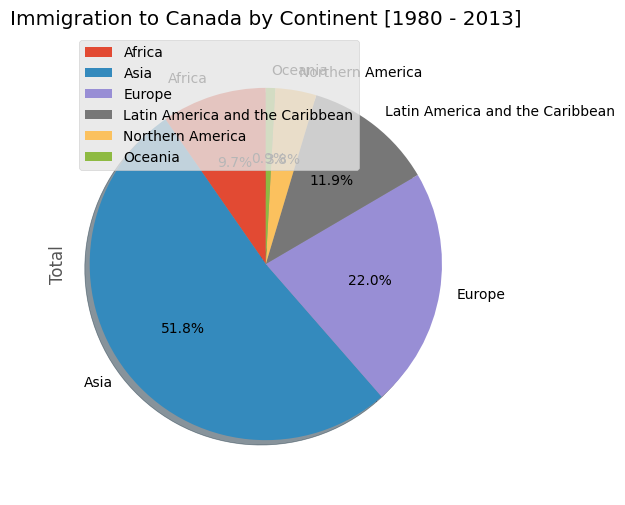

In [50]:
# autopct create %, start angle represent starting point
df_continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=df_continents.index, loc='upper left')

plt.show()

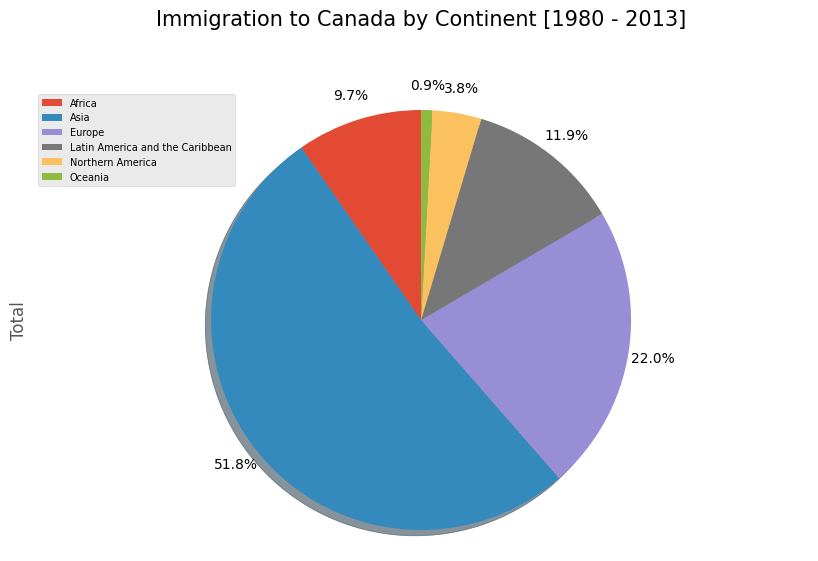

In [51]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(10, 6),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True,
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct
                            #colors=colors_list,  # add custom colors
                            #explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12, fontsize = 15)

plt.axis('equal')

# add legend
plt.legend(labels=df_continents.index, loc='upper left', fontsize=7)

plt.show()

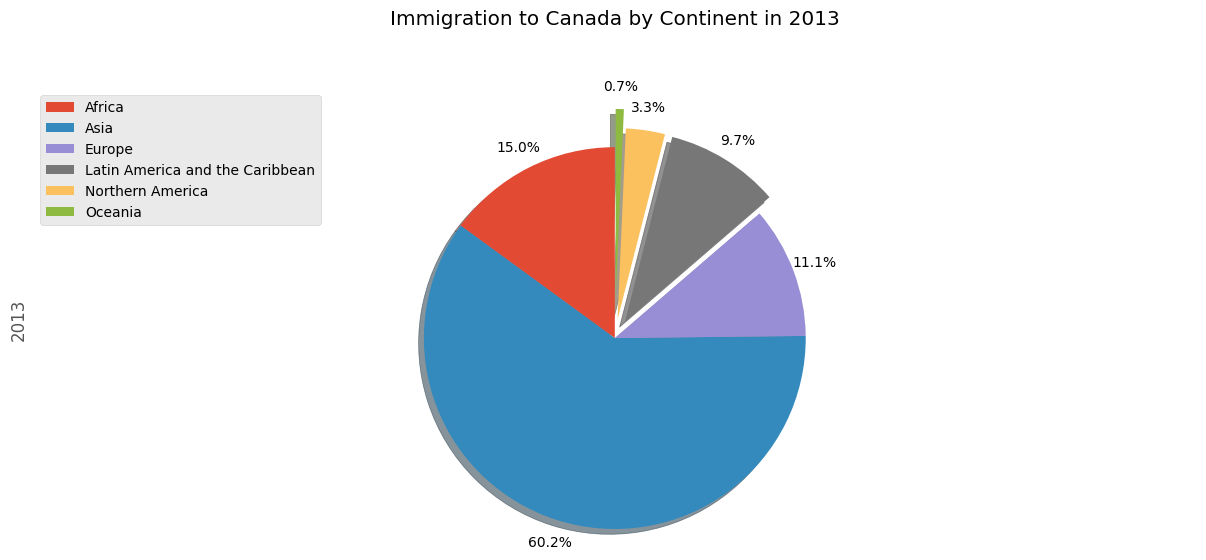

In [52]:
# Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013
explode_list = [0.0, 0, 0, 0.1, 0.1, 0.2] # ratio for each continent with which to offset each wedge.

df_continents['2013'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True,
                            labels=None,                 # turn off labels on pie chart
                            pctdistance=1.12,            # the ratio between the pie center and start of text label
                            explode=explode_list         # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent in 2013', y=1.12)
plt.axis('equal')

# add legend
plt.legend(labels=df_continents.index, loc='upper left')

# show plot
plt.show()

## Box Plots

In [53]:
# to get a dataframe, place extra square brackets around 'Japan'.
df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


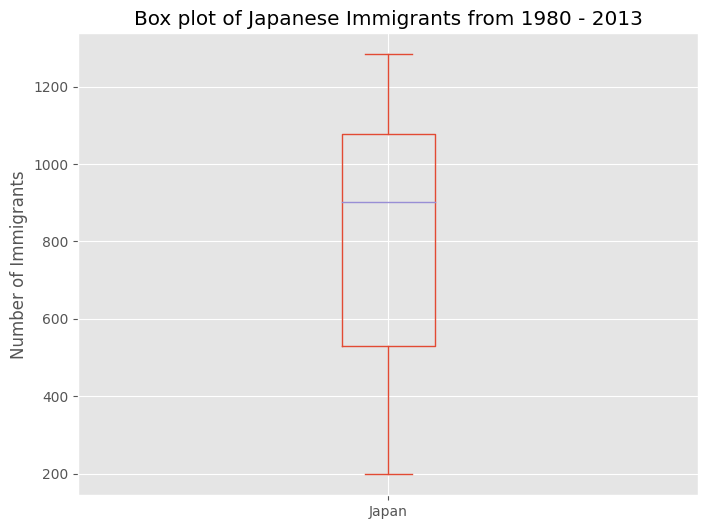

In [54]:
df_japan.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

We can immediately make a few key observations from the plot above:

1. The minimum number of immigrants is around 200 (min), maximum number is around 1300 (max), and median number of immigrants is around 900 (median).
2. 25% of the years for period 1980 - 2013 had an annual immigrant count of ~500 or fewer (First quartile).
3. 75% of the years for period 1980 - 2013 had an annual immigrant count of ~1100 or fewer (Third quartile).

We can view the actual numbers by calling the describe() method on the dataframe.

In [55]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


In [56]:
# Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013.
df_CI= df_can.loc[['China', 'India'], years].transpose()
df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


In [57]:
df_CI.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


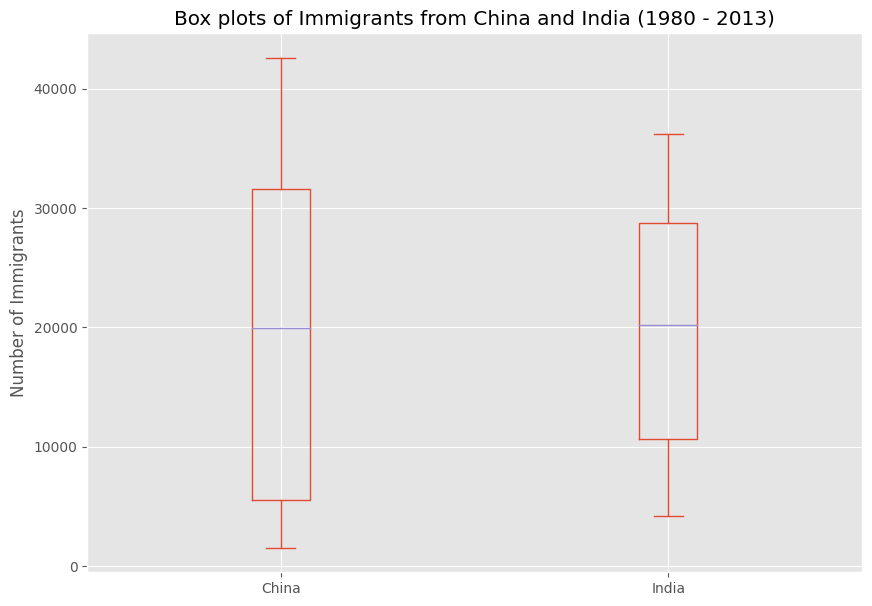

In [58]:
# Plot
df_CI.plot(kind='box', figsize=(10, 7))

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.ylabel('Number of Immigrants')

plt.show()

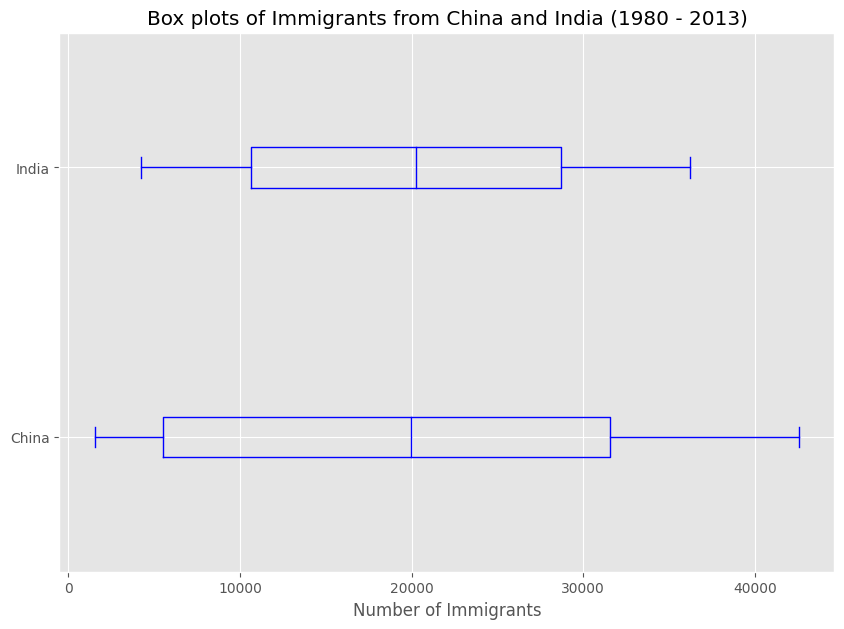

In [59]:
# horizontal box plots
df_CI.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

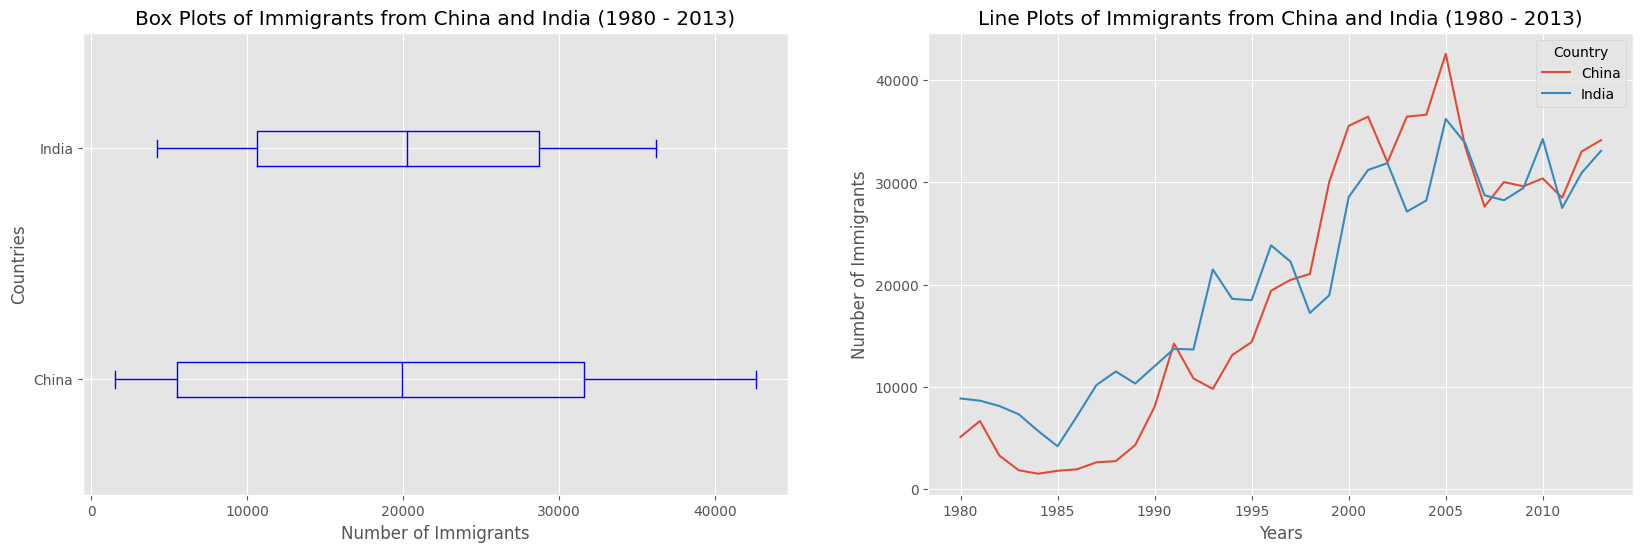

In [60]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

In [61]:
#  visualize the distribution of the top 15 countries (based on total immigration) grouped by the decades 1980s, 1990s, and 2000s
df_top15 = df_can.sort_values(['Total'], ascending=False, axis=0).head(15)
df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


In [62]:
# create a list of all years in decades 80's, 90's, and 00's
years_80s = list(map(str, range(1980, 1990)))
years_90s = list(map(str, range(1990, 2000)))
years_00s = list(map(str, range(2000, 2010)))

# slice the original dataframe df_can to create a series for each decade
df_80s = df_top15.loc[:, years_80s].sum(axis=1)
df_90s = df_top15.loc[:, years_90s].sum(axis=1)
df_00s = df_top15.loc[:, years_00s].sum(axis=1)

# merge the three series into a new data frame
new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s})

# display dataframe
new_df.head()

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


In [63]:
new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


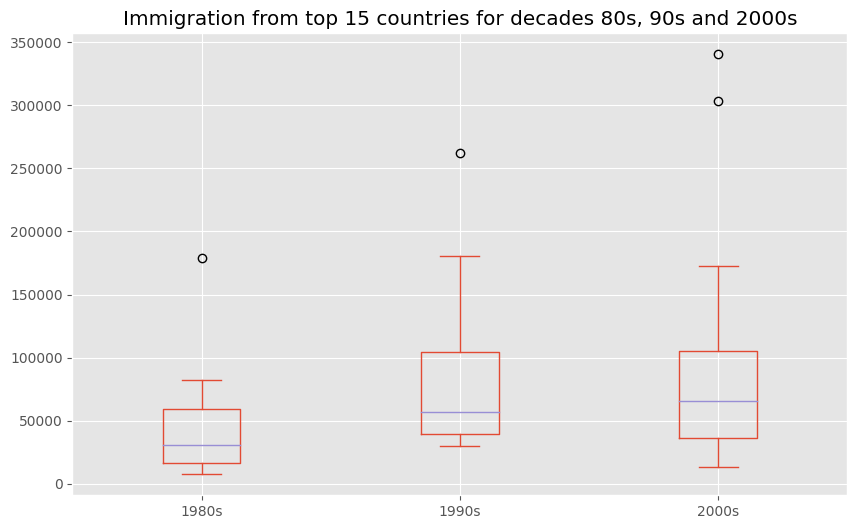

In [64]:
# Plot the box plots.
new_df.plot(kind='box', figsize=(10, 6))

plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')

plt.show()

Note how the box plot differs from the summary table created. The box plot scans the data and identifies the outliers. In order to be an outlier, the data value must be:

* larger than Q3 by at least 1.5 times the interquartile range (IQR), or,
* smaller than Q1 by at least 1.5 times the IQR.

Let's look at decade 2000s as an example:

* Q1 (25%) = 36,101.5
* Q3 (75%) = 105,505.5
* IQR = Q3 - Q1 = 69,404

Using the definition of outlier, any value that is greater than Q3 by 1.5 times IQR will be flagged as outlier.

Outlier > 105,505.5 + (1.5 * 69,404)

Outlier > 209,611.5

In [65]:
# let's check how many entries fall above the outlier threshold
new_df=new_df.reset_index()
new_df[new_df['2000s']> 209611.5]

,Country,1980s,1990s,2000s
0,India,82154,180395,303591
1,China,32003,161528,340385


## Scatter Plots

In [66]:
# visualize the trend of total immigrantion to Canada (all countries combined) for the years 1980 - 2013.
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


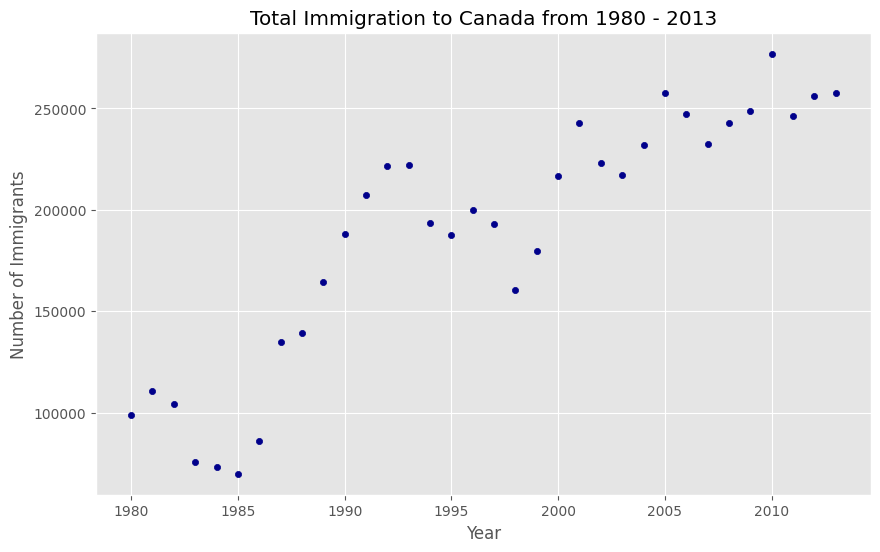

In [67]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

We can clearly observe an upward trend in the data: as the years go by, the total number of immigrants increases. We can mathematically analyze this upward trend using a regression line (line of best fit).

In [68]:
x = df_tot['year']      # year on x-axis
y = df_tot['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

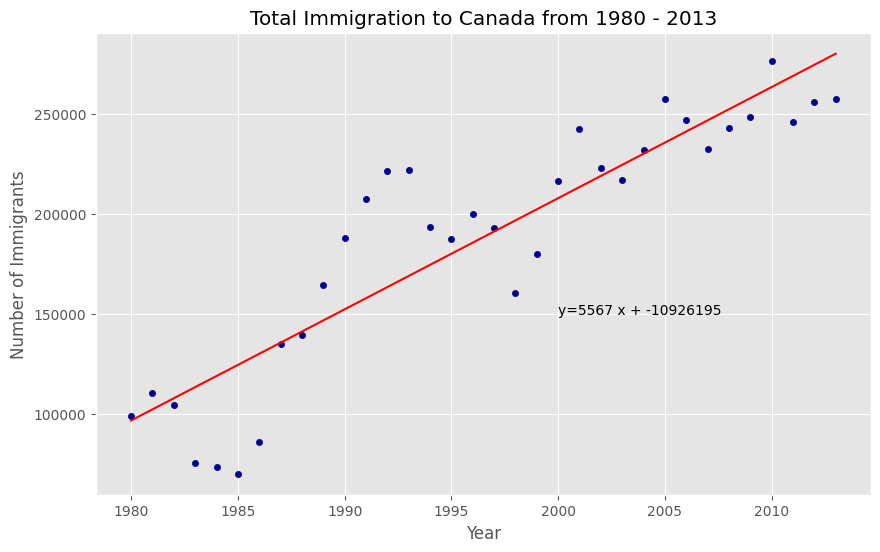

'No. Immigrants = 5567 * Year + -10926195'

In [69]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1])

In [70]:
# a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013
# create df_countries dataframe
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

# create df_total by summing across three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=1))

# reset index in place
df_total.reset_index(inplace=True)

# rename columns
df_total.columns = ['year', 'total']

# change column year from string to int to create scatter plot
df_total['year'] = df_total['year'].astype(int)

# show resulting dataframe
df_total.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


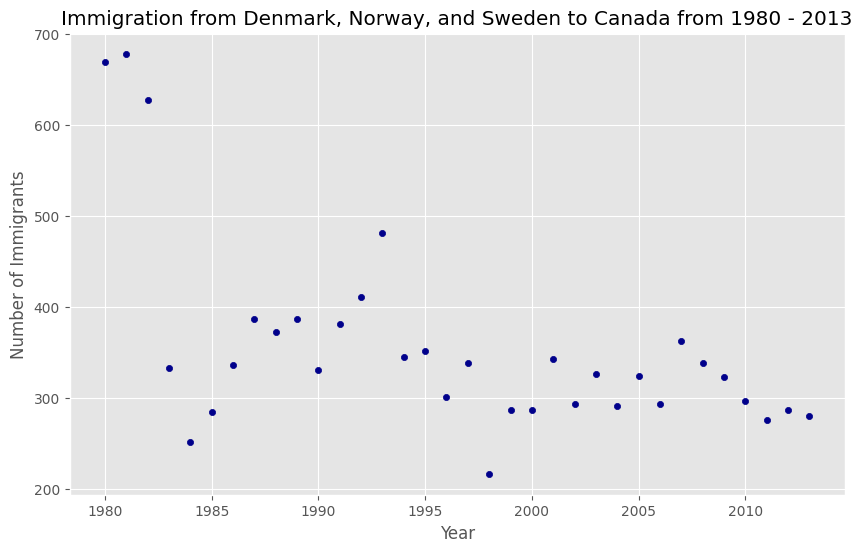

In [71]:
# generate scatter plot
df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

# add title and label to axes
plt.title('Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# show plot
plt.show()

## Bubble Plots

In [72]:
# Get the data for Brazil and Argentina
# transposed dataframe
df_can_t = df_can[years].transpose()

# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head()

Country,Year,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,Republic of Korea,...,Andorra,Vanuatu,Sao Tome and Principe,Tuvalu,American Samoa,New Caledonia,San Marino,Marshall Islands,Western Sahara,Palau
0,1980,8880,5123,22045,6051,978,9378,1172,185,1011,...,0,0,0,0,0,0,1,0,0,0
1,1981,8670,6682,24796,5921,972,10030,1429,371,1456,...,0,0,0,1,1,0,0,0,0,0
2,1982,8147,3308,20620,5249,1201,9074,1822,290,1572,...,0,0,0,0,0,0,0,0,0,0
3,1983,7338,1863,10015,4562,900,7100,1592,197,1081,...,0,0,0,0,0,0,0,0,0,0
4,1984,5704,1527,10170,3801,668,6661,1977,1086,847,...,0,0,0,1,0,0,0,0,0,0


Create the normalized weights.

There are several methods of normalizations in statistics, each with its own use. In this case, we will use feature scaling to bring all values into the range [0, 1]. The general formula is:

$$
X^{\prime}=\frac{X-X_{min}}{X_{max} - X_{min}}
$$

where $X$ is the original value, $X^{\prime}$ is the corresponding normalized value. The formula sets the max value in the dataset to 1, and sets the min value to 0. The rest of the data points are scaled to a value between 0-1 accordingly.

In [73]:
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

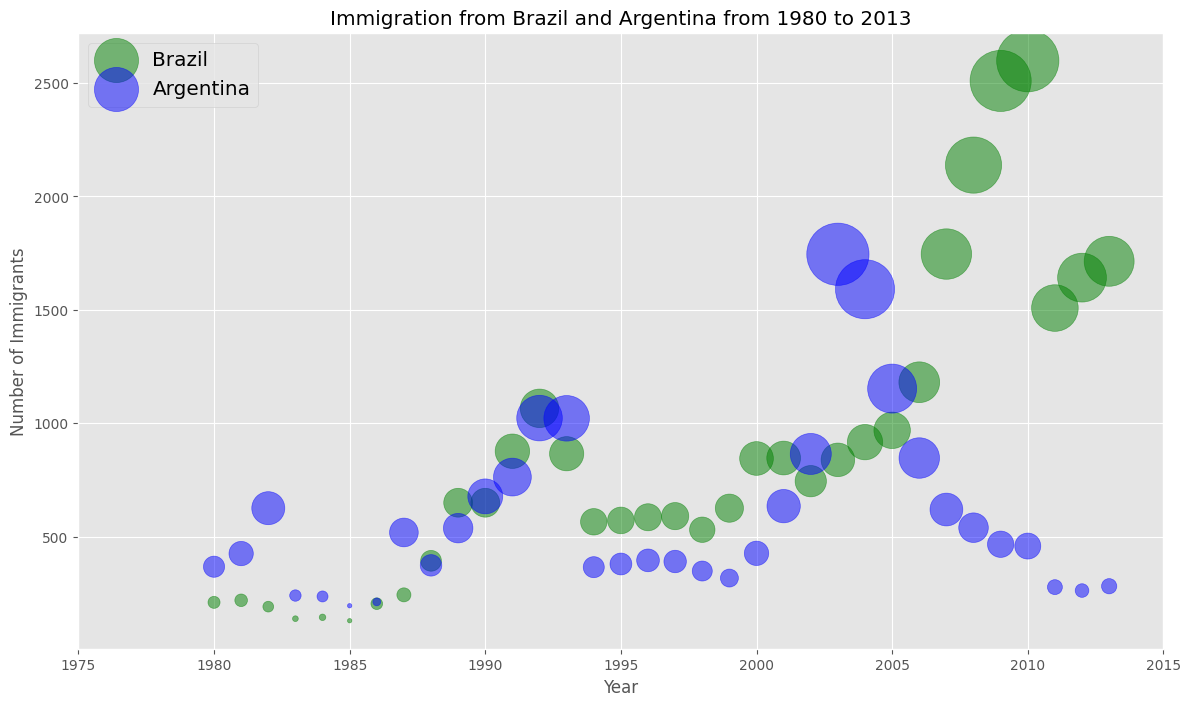

In [74]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights
                    xlim=(1975, 2015)
                    )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

In [75]:
# Normalize the data pertaining to China and India.
# normalized Chinese data
norm_china = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())
# normalized Indian data
norm_india = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())

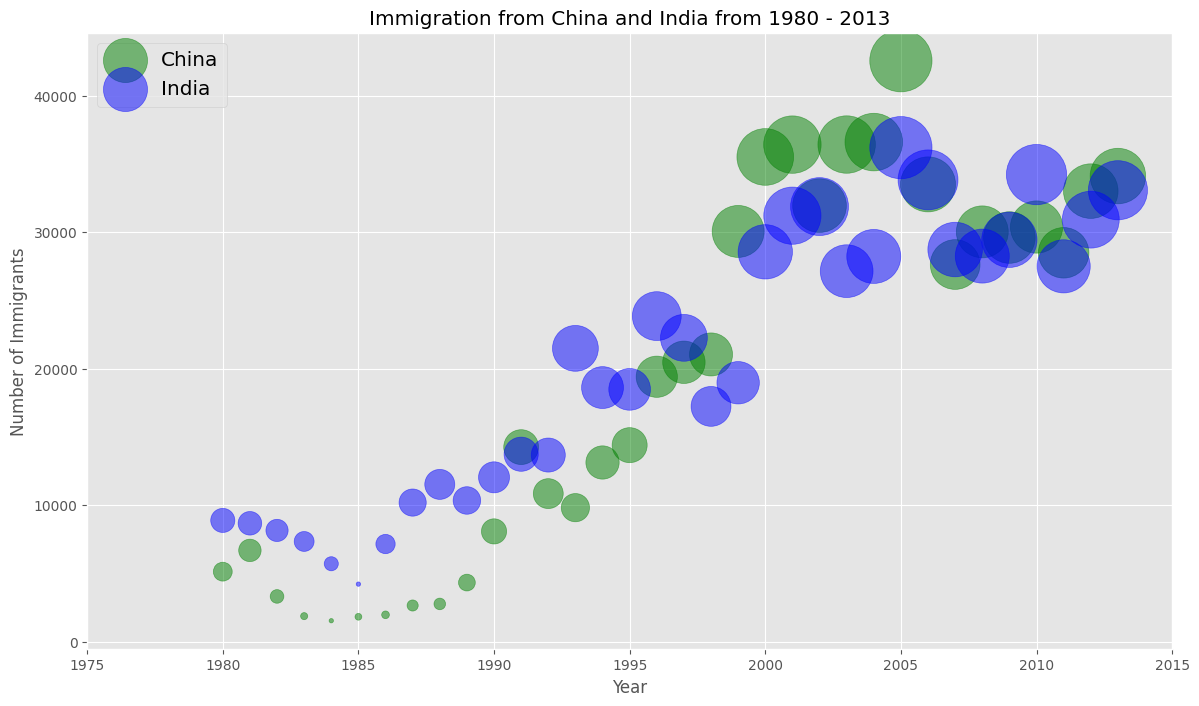

In [76]:
# China
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='China',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_china * 2000 + 10,  # pass in weights
                    xlim=(1975, 2015)
                   )

# India
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='India',
                    alpha=0.5,
                    color="blue",
                    s=norm_india * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from China and India from 1980 - 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')

## Area Plots

we created a line plot that visualized the top 5 countries that contribued the most immigrants to Canada from 1980 to 2013. With a little modification to the code, we can visualize this plot as a cumulative plot, also knows as a Stacked Line Plot or Area plot.

In [77]:
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df_can.head()

# transpose the dataframe
df_top5 = df_top5[years].transpose()

df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


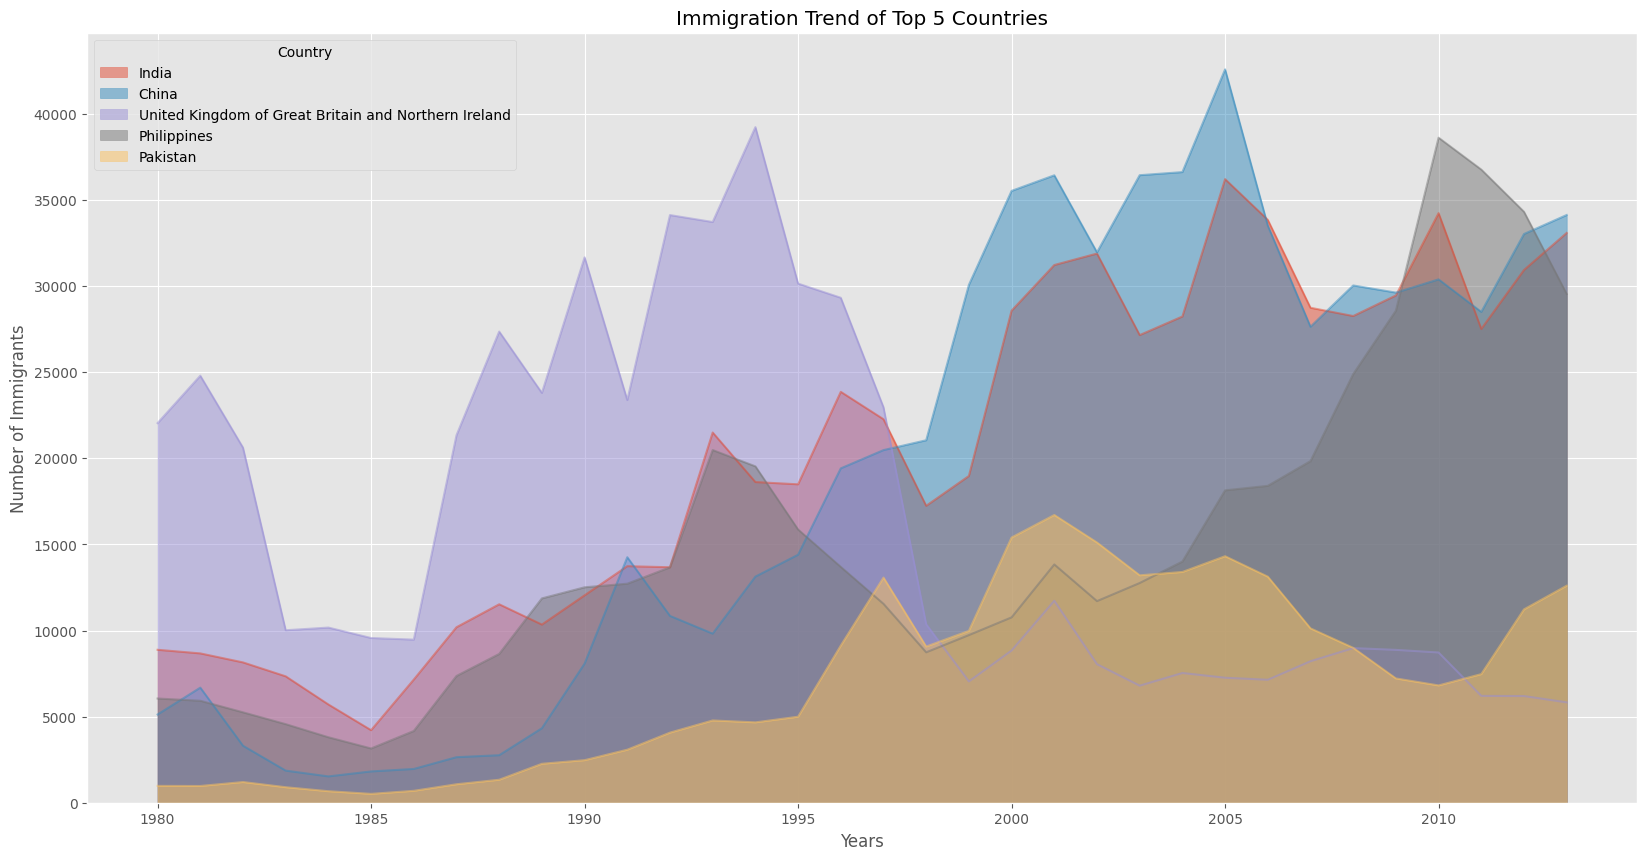

In [78]:
# let's change the index values of df_top5 to type integer for plotting
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='area',
             stacked=False,
             figsize=(20, 10))  # pass a tuple (x, y) size

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

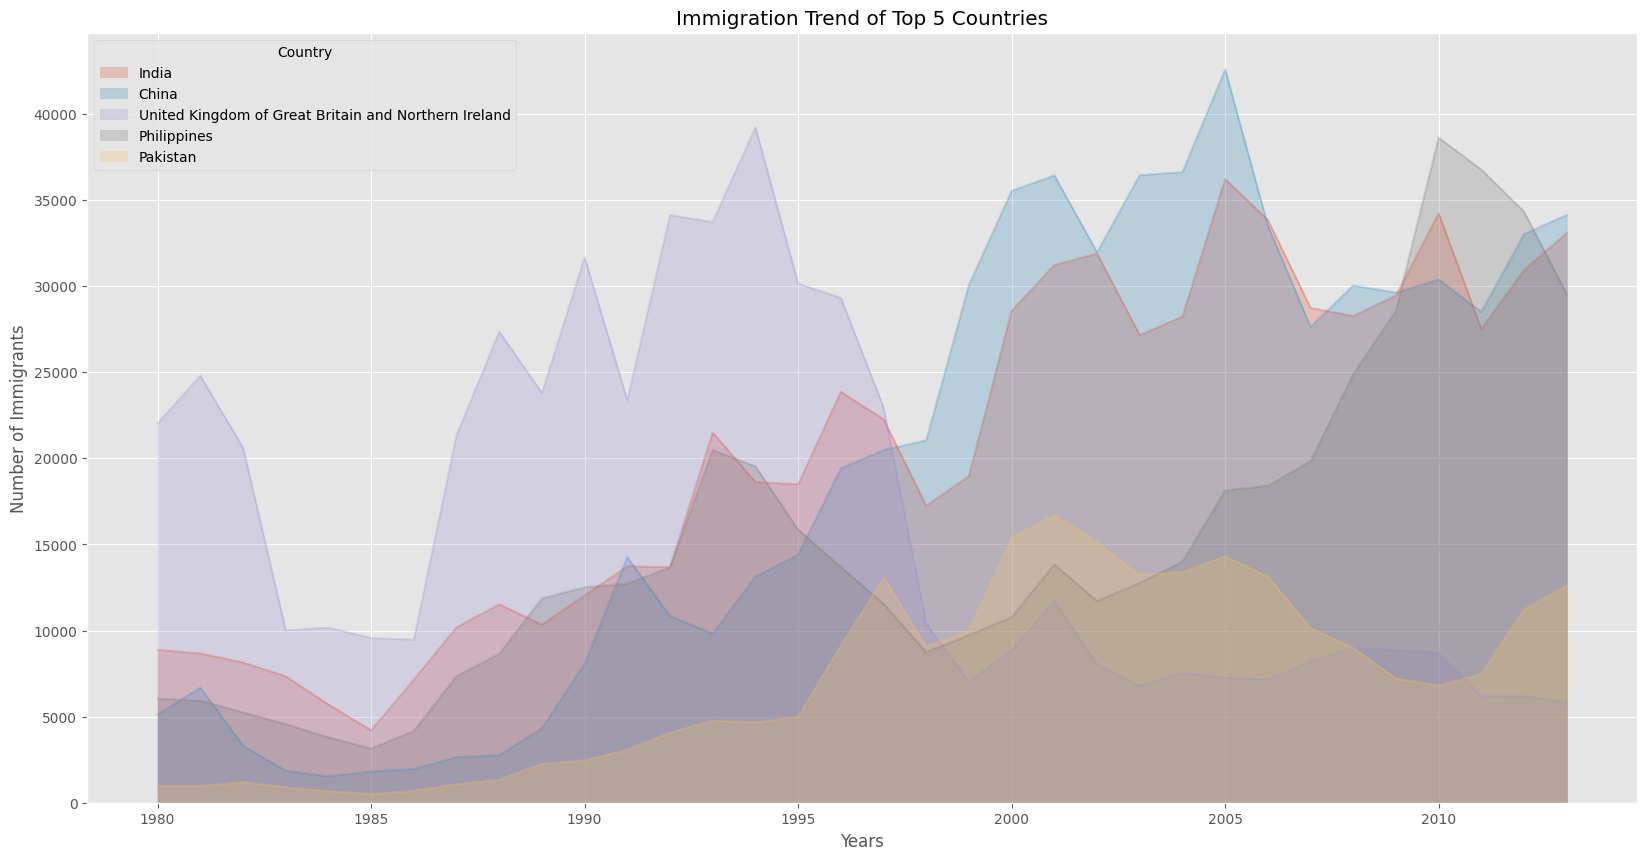

In [79]:
# The unstacked plot has a default transparency (alpha value) at 0.5. We can modify this value by passing in the alpha parameter.
df_top5.plot(kind='area',
             alpha=0.25,  # 0 - 1, default value alpha = 0.5
             stacked=False,
             figsize=(20, 10))

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

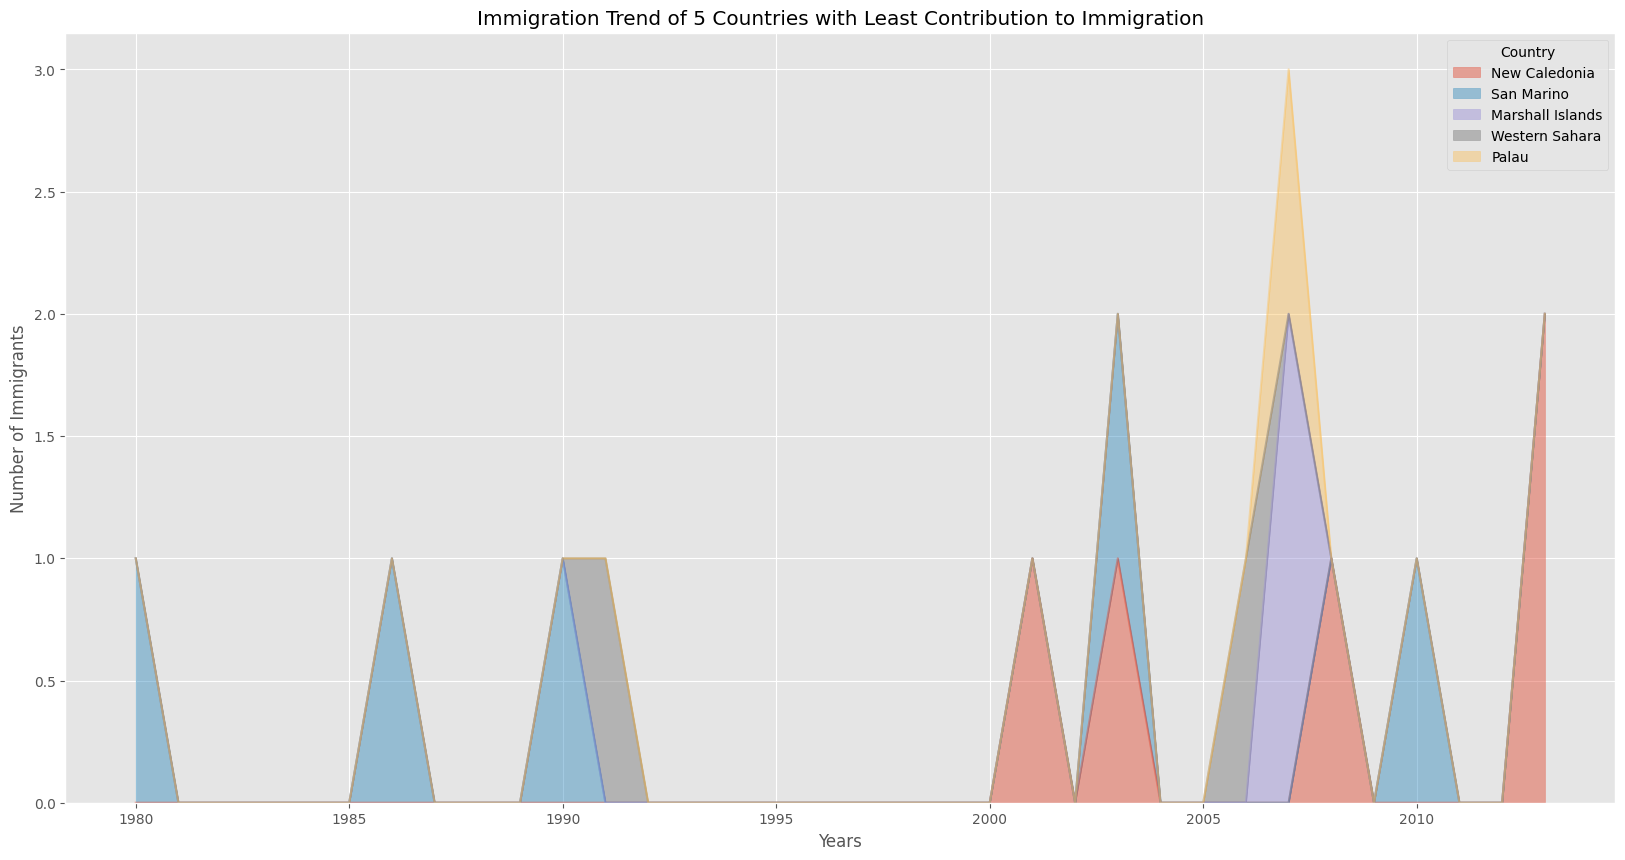

In [80]:
# Create a stacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013.
# Use a transparency value of 0.45.
df_least5 = df_can.tail(5)

# transpose the dataframe
df_least5 = df_least5[years].transpose()
df_least5.head()

df_least5.index = df_least5.index.map(int) # let's change the index values of df_least5 to type integer for plotting
df_least5.plot(kind='area', alpha=0.45, figsize=(20, 10))

plt.title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

Text(0.5, 0, 'Years')

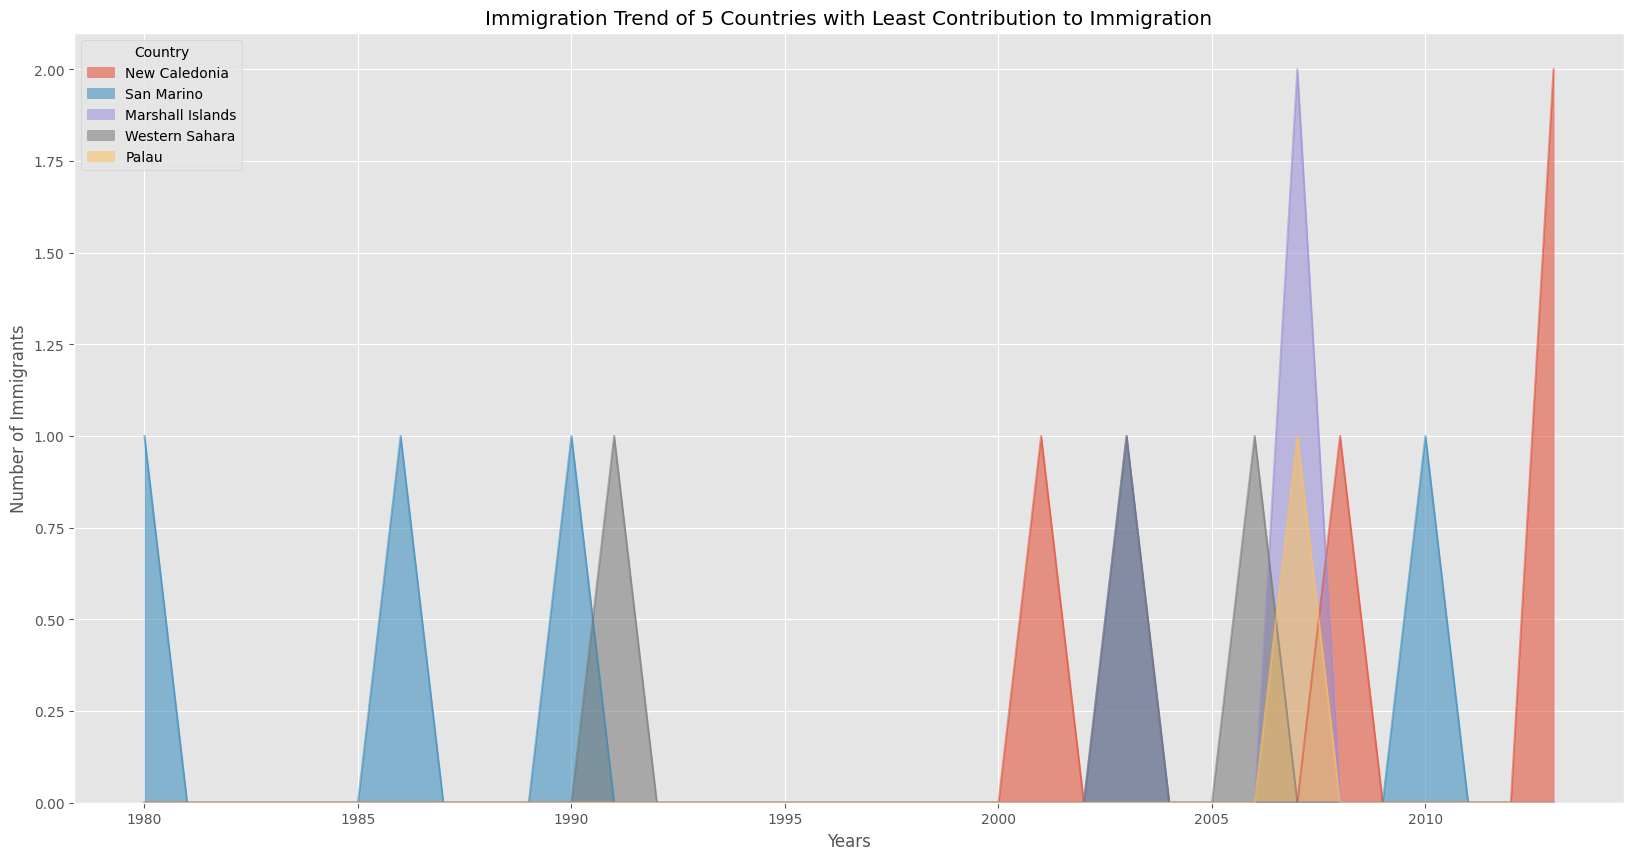

In [81]:
df_least5 = df_can.tail(5)

# transpose the dataframe
df_least5 = df_least5[years].transpose()

df_least5.head()

df_least5.index = df_least5.index.map(int) # let's change the index values of df_least5 to type integer for plotting

ax = df_least5.plot(kind='area', alpha=0.55, stacked=False, figsize=(20, 10))

ax.set_title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')


## Histograms

A histogram is a way of representing the frequency distribution of numeric dataset. The way it works is it partitions the x-axis into bins, assigns each data point in our dataset to a bin, and then counts the number of data points that have been assigned to each bin. So the y-axis is the frequency or the number of data points in each bin. Note that we can change the bin size and usually one needs to tweak it so that the distribution is displayed nicely.

In [82]:
# What is the frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013?
# let's quickly view the 2013 data
df_can['2013'].head()

,2013
Country,
India,33087
China,34129
United Kingdom of Great Britain and Northern Ireland,5827
Philippines,29544
Pakistan,12603


In [83]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(df_can['2013'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


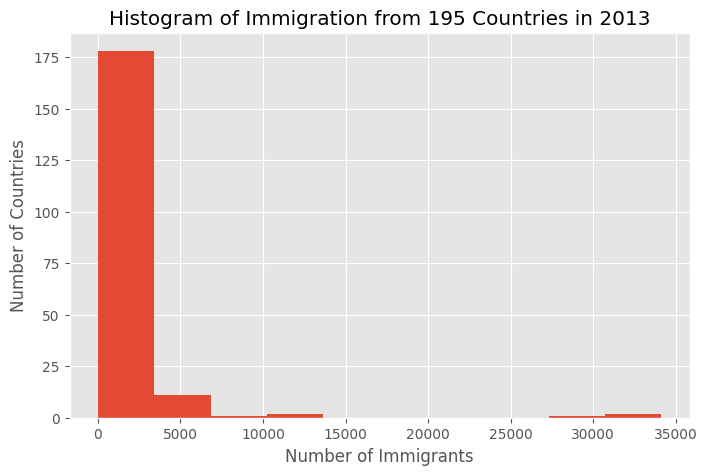

In [84]:
df_can['2013'].plot(kind='hist', figsize=(8, 5))

# add a title to the histogram
plt.title('Histogram of Immigration from 195 Countries in 2013')
# add y-label
plt.ylabel('Number of Countries')
# add x-label
plt.xlabel('Number of Immigrants')

plt.show()

In the above plot, the x-axis represents the population range of immigrants in intervals of 3412.9. The y-axis represents the number of countries that contributed to the aforementioned population.

Notice that the x-axis labels do not match with the bin size. This can be fixed by passing in a xticks keyword that contains the list of the bin sizes, as follows:

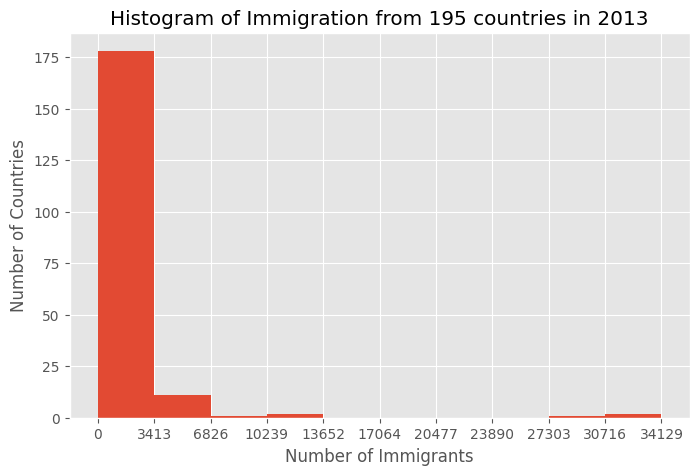

In [85]:
# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(df_can['2013'])

df_can['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

In [86]:
# What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013?
# let's quickly view the dataset
df_can.loc[['Denmark', 'Norway', 'Sweden'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


<Axes: ylabel='Frequency'>

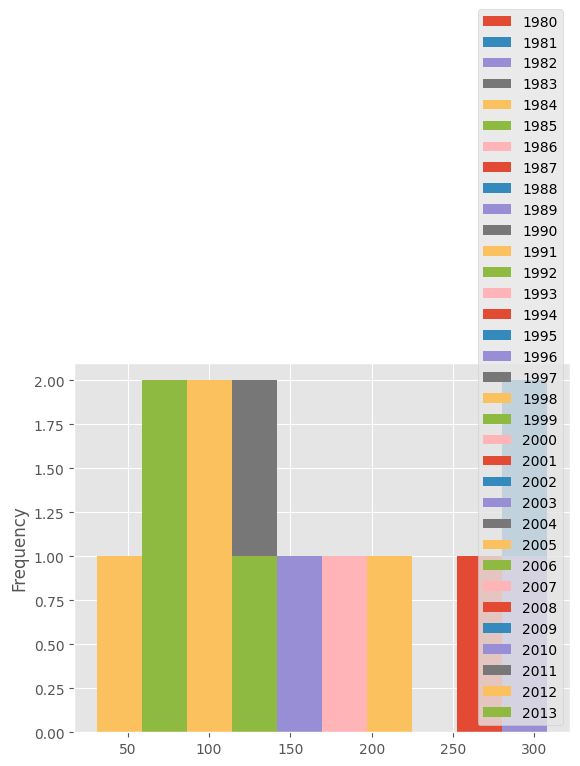

In [87]:
# generate histogram
df_can.loc[['Denmark', 'Norway', 'Sweden'], years].plot.hist()

That does not look right!

we'll often come across situations like this when creating plots. The solution often lies in how the underlying dataset is structured.

Instead of plotting the population frequency distribution of the population for the 3 countries, pandas instead plotted the population frequency distribution for the years.

This can be easily fixed by first transposing the dataset, and then plotting as shown below.

In [88]:
# transpose dataframe
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


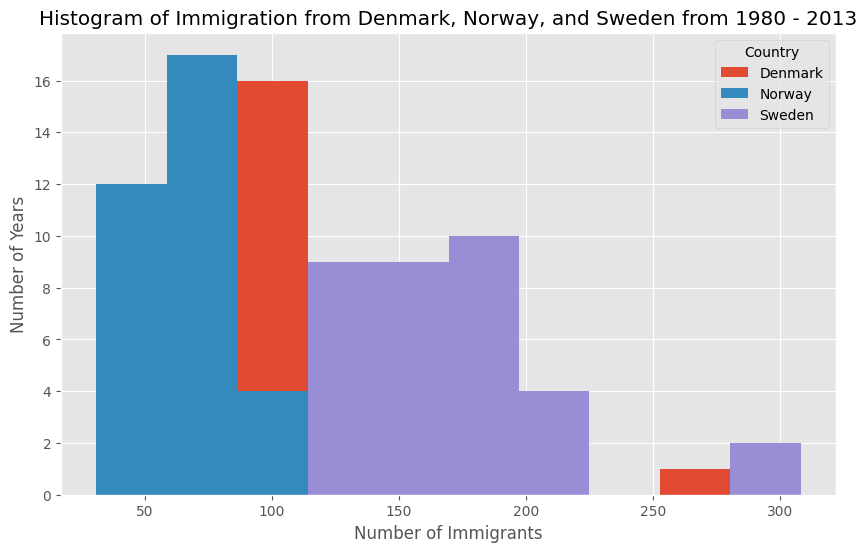

In [89]:
# generate histogram
df_t.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

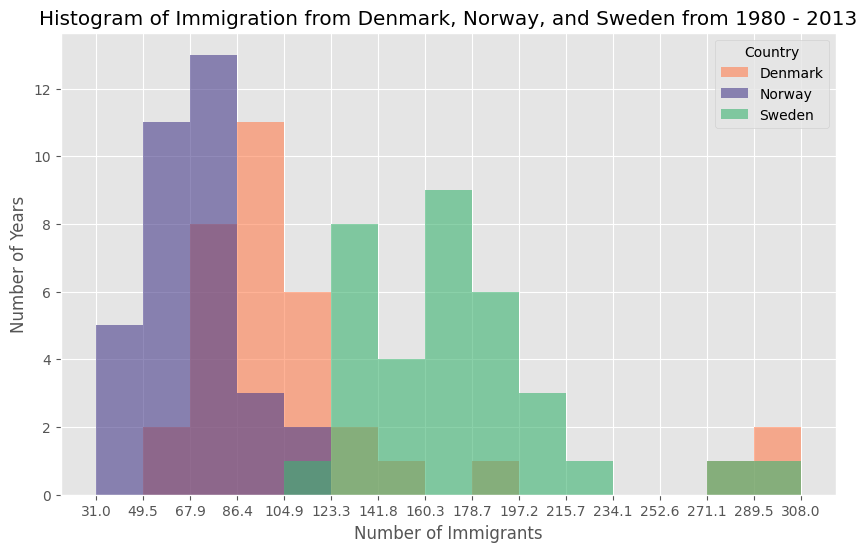

In [90]:
# let's get the x-tick values
count, bin_edges = np.histogram(df_t, 15)

# un-stacked histogram
df_t.plot(kind ='hist',
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

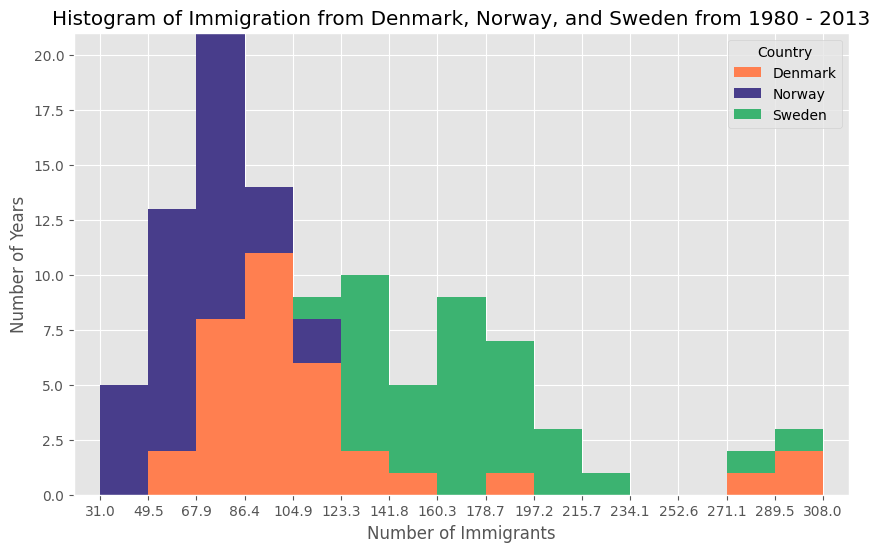

In [91]:
count, bin_edges = np.histogram(df_t, 15)
xmin = bin_edges[0] - 10   #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes
xmax = bin_edges[-1] + 10  #  last bin value is 308.0, adding buffer of 10 for aesthetic purposes

# stacked Histogram
df_t.plot(kind='hist',
          figsize=(10, 6),
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax)
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

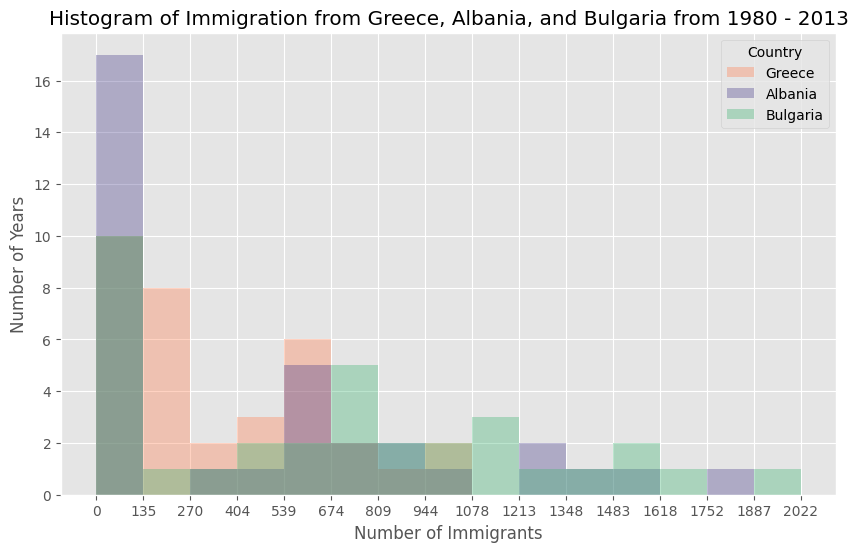

In [92]:
# Immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013
# create a dataframe of the countries of interest (cof)
df_cof = df_can.loc[['Greece', 'Albania', 'Bulgaria'], years]

# transpose the dataframe
df_cof = df_cof.transpose()

# let's get the x-tick values
count, bin_edges = np.histogram(df_cof, 15)

# Un-stacked Histogram
df_cof.plot(kind ='hist',
            figsize=(10, 6),
            bins=15,
            alpha=0.35,
            xticks=bin_edges,
            color=['coral', 'darkslateblue', 'mediumseagreen']
            )

plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

## Bar Charts

A bar plot is a way of representing data where the length of the bars represents the magnitude/size of the feature/variable. Bar graphs usually represent numerical and categorical variables grouped in intervals.

To create a bar plot, we can pass one of two arguments via kind parameter in plot():

* kind=bar creates a vertical bar plot
* kind=barh creates a horizontal bar plot

In [93]:
# Let's compare the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013.
# get the data
df_iceland = df_can.loc['Iceland', years]
df_iceland.head()

,Iceland
1980,17
1981,33
1982,10
1983,9
1984,13


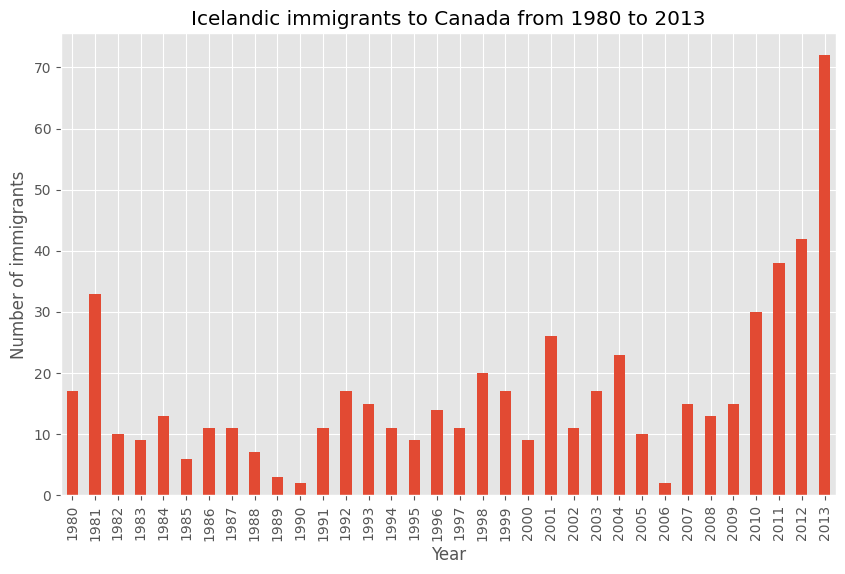

In [94]:
# step 2: plot data
df_iceland.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

The bar plot above shows the total number of immigrants broken down by each year. We can clearly see the impact of the financial crisis; the number of immigrants to Canada started increasing rapidly after 2008.

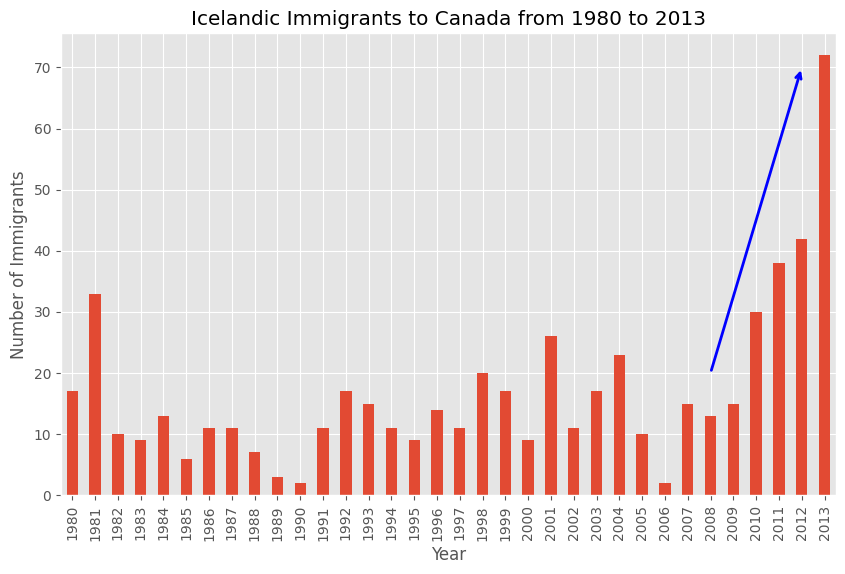

In [95]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90)  # rotate the xticks(labelled points on x-axis) by 90 degrees

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. Will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

plt.show()

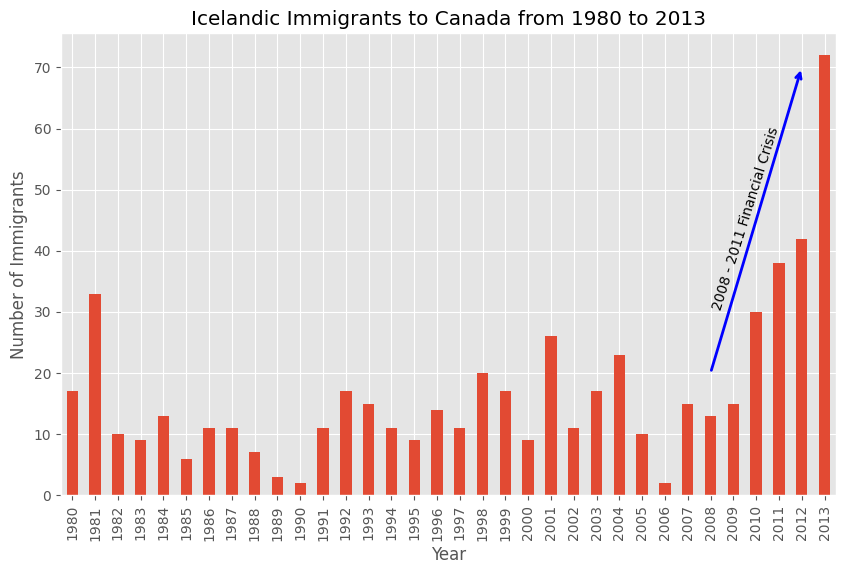

In [96]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90)

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis',  # text to display
             xy=(28, 30),  # start the text at at point (year 2008 , pop 30)
             rotation=72.5,  # based on trial and error to match the arrow
             va='bottom',  # want the text to be vertically 'bottom' aligned
             ha='left',  # want the text to be horizontally 'left' algned.
             )

plt.show()

In [97]:
# total number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013.
# Label each country with the total immigrant count.
# sort dataframe on 'Total' column (descending)
df_can.sort_values(by='Total', ascending=True, inplace=True)

# get top 15 countries
df_top15 = df_can['Total'].tail(15)
df_top15

,Total
Country,
Romania,93585
Viet Nam,97146
Jamaica,106431
France,109091
Lebanon,115359
Poland,139241
Republic of Korea,142581
Sri Lanka,148358
Iran (Islamic Republic of),175923


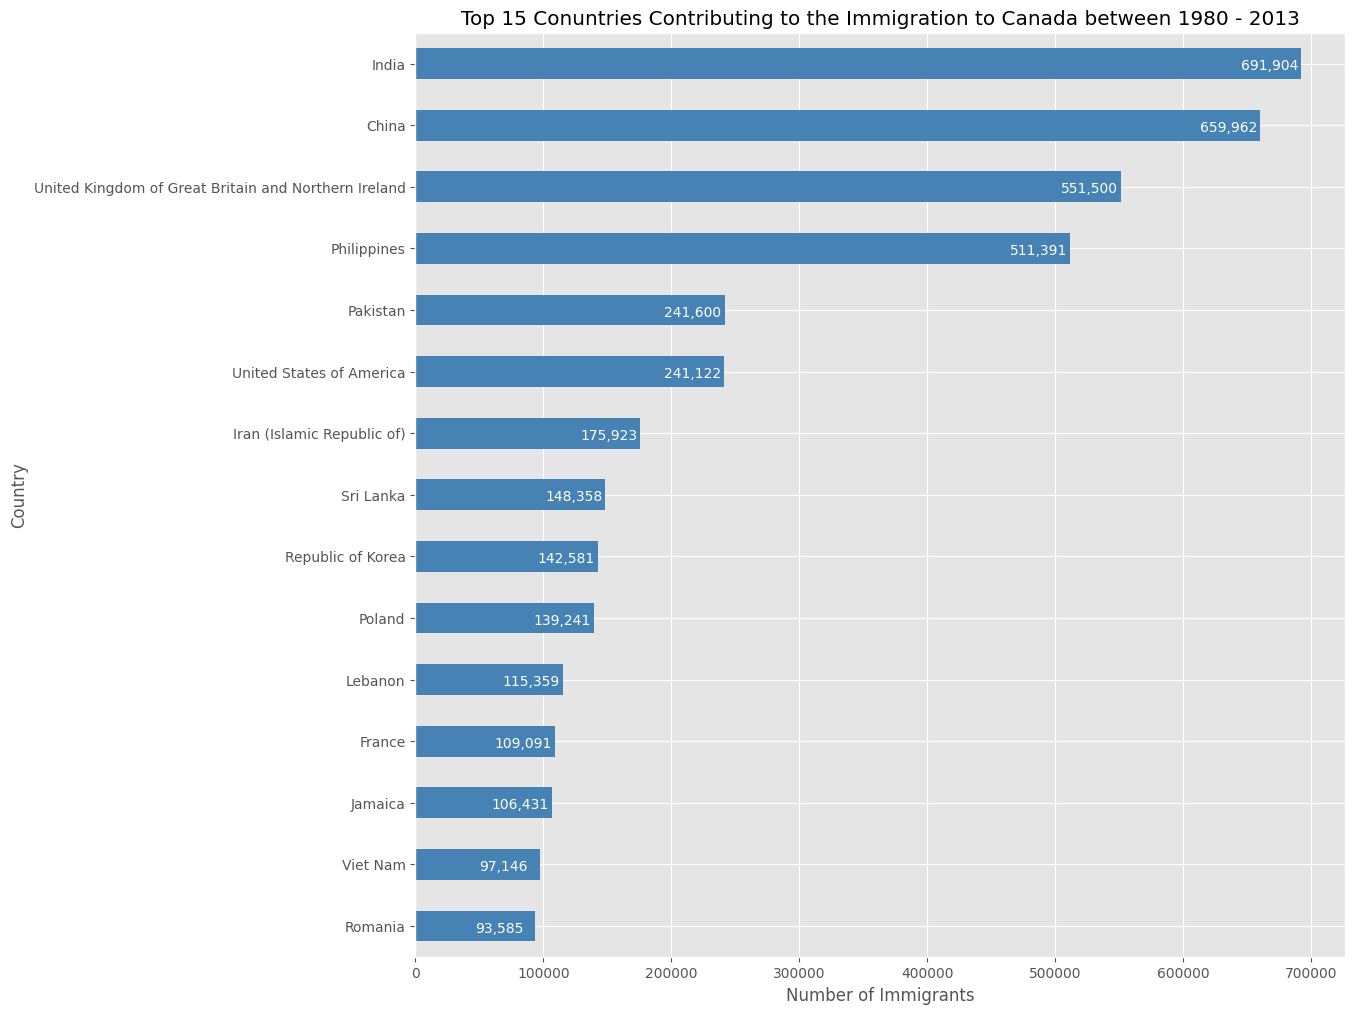

In [98]:
# generate plot
df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

# annotate value labels to each country
for index, value in enumerate(df_top15):
    label = format(int(value), ',') # format int with commas

# place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')

plt.show()

## Creating maps and visualizing Geospatial data

In [99]:
import folium

print('Folium installed and imported!')

Folium installed and imported!


Folium is a powerful Python library that helps you create several types of Leaflet maps. The fact that the Folium results are interactive makes this library very useful for dashboard building.

From the official Folium documentation page:

> Folium builds on the data wrangling strengths of the Python ecosystem and the mapping strengths of the Leaflet.js library. Manipulate your data in Python, then visualize it in on a Leaflet map via Folium.

> Folium makes it easy to visualize data that's been manipulated in Python on an interactive Leaflet map. It enables both the binding of data to a map for choropleth visualizations as well as passing Vincent/Vega visualizations as markers on the map.

> The library has a number of built-in tilesets from OpenStreetMap, Mapbox, Cartodb and supports custom tilesets with Mapbox or Cloudmade API keys. Folium supports both GeoJSON and TopoJSON overlays, as well as the binding of data to those overlays to create choropleth maps with color-brewer color schemes.

Generating the world map is straightforward in Folium. You simply create a Folium Map object, and then you display it. What is attractive about Folium maps is that they are interactive, so you can zoom into any region of interest despite the initial zoom level.

In [100]:
# define the world map
world_map = folium.Map()

# display world map
world_map

In [101]:
# define the world map centered around Canada with a low zoom level
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4)

# display world map
world_map

In [102]:
# define the world map centered around Canada with a higher zoom level
world_map = folium.Map(location=[56.130, -106.35], zoom_start=8)

# display world map
world_map

In [103]:
### type your answer here
#define Mexico's geolocation coordinates
mexico_latitude = 23.6345
mexico_longitude = -102.5528

# define the world map centered around Canada with a higher zoom level
mexico_map = folium.Map(location=[mexico_latitude, mexico_longitude], zoom_start=4)

# display world map
mexico_map

In [104]:
# create a Cartodb dark_matter map of the world centered around Canada
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4, tiles='Cartodb dark_matter')

# display map
world_map

In [105]:
# create a Cartodb positron map of the world centered around Canada
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4, tiles='Cartodb positron')

# display map
world_map

In [106]:
#define Mexico's geolocation coordinates
mexico_latitude = 23.6345
mexico_longitude = -102.5528

# define the world map centered around Canada with a higher zoom level
mexico_map = folium.Map(location=[mexico_latitude, mexico_longitude], zoom_start=6, tiles='Cartodb positron')

# display world map
mexico_map

**Maps with Markers**

Let's download and import the data on police department incidents using pandas read_csv() method.

Download the dataset and read it into a pandas dataframe:

In [107]:
df_incidents = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Police_Department_Incidents_-_Previous_Year__2016_.csv')

print('Dataset downloaded and read into a pandas dataframe!')

Dataset downloaded and read into a pandas dataframe!


In [108]:
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [109]:
df_incidents.shape

(150500, 13)

In [110]:
# get the first 100 crimes in the df_incidents dataframe
limit = 100
df_incidents = df_incidents.iloc[0:limit, :]

In [111]:
df_incidents.shape

(100, 13)

In [112]:
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

In [113]:
# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of San Francisco
sanfran_map

Now let's superimpose the locations of the crimes onto the map. The way to do that in Folium is to create a feature group with its own features and style and then add it to the sanfran_map.

In [115]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
sanfran_map.add_child(incidents)

In [117]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)

# add incidents to map
sanfran_map.add_child(incidents)

In [118]:
# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# loop through the 100 crimes and add each to the map
for lat, lng, label in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(sanfran_map)

# show map
sanfran_map

In [119]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(sanfran_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
sanfran_map

# Author
Dilshod Durdiev